<a href="https://colab.research.google.com/github/tx6195/diamonds/blob/main/diamond_price_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Define the Problem

In [2]:
# Given the data, for this project you will:
#-  Conduct an EDA which should include:
#   - The use the ML Notebook template.
#   - Visualizations of the data (at least 3).
#   - Visualizations of chosen parameters (if not choosing the whole dataset for intended goal - e.g. regression or classification).
#- Training of several ML models
#   - Conclusive explanation detailing why a particular model was chosen.  e.g. if you chose a decision tree instead of a logistic regression.
#- Two notebooks
#   - One notebook consisting of the EDA and model training
#   - Second notebook used to utilize and make predictions with the saved model.
#- Submit the link to the repo for the project containing the dataset and the notebooks.

#Task 2a: Install the Needed Libraries

In [3]:
# all libraries installed

#Task 2b: Import the Needed Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

#Task 3: Load the Data

In [5]:
data = pd.read_csv('/content/drive/MyDrive/diamonds.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [6]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Get Data Info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
print(data['clarity'].unique().tolist())

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']


In [9]:
print(data['color'].unique().tolist())

['E', 'I', 'J', 'H', 'F', 'G', 'D']


In [10]:
print(data['cut'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']


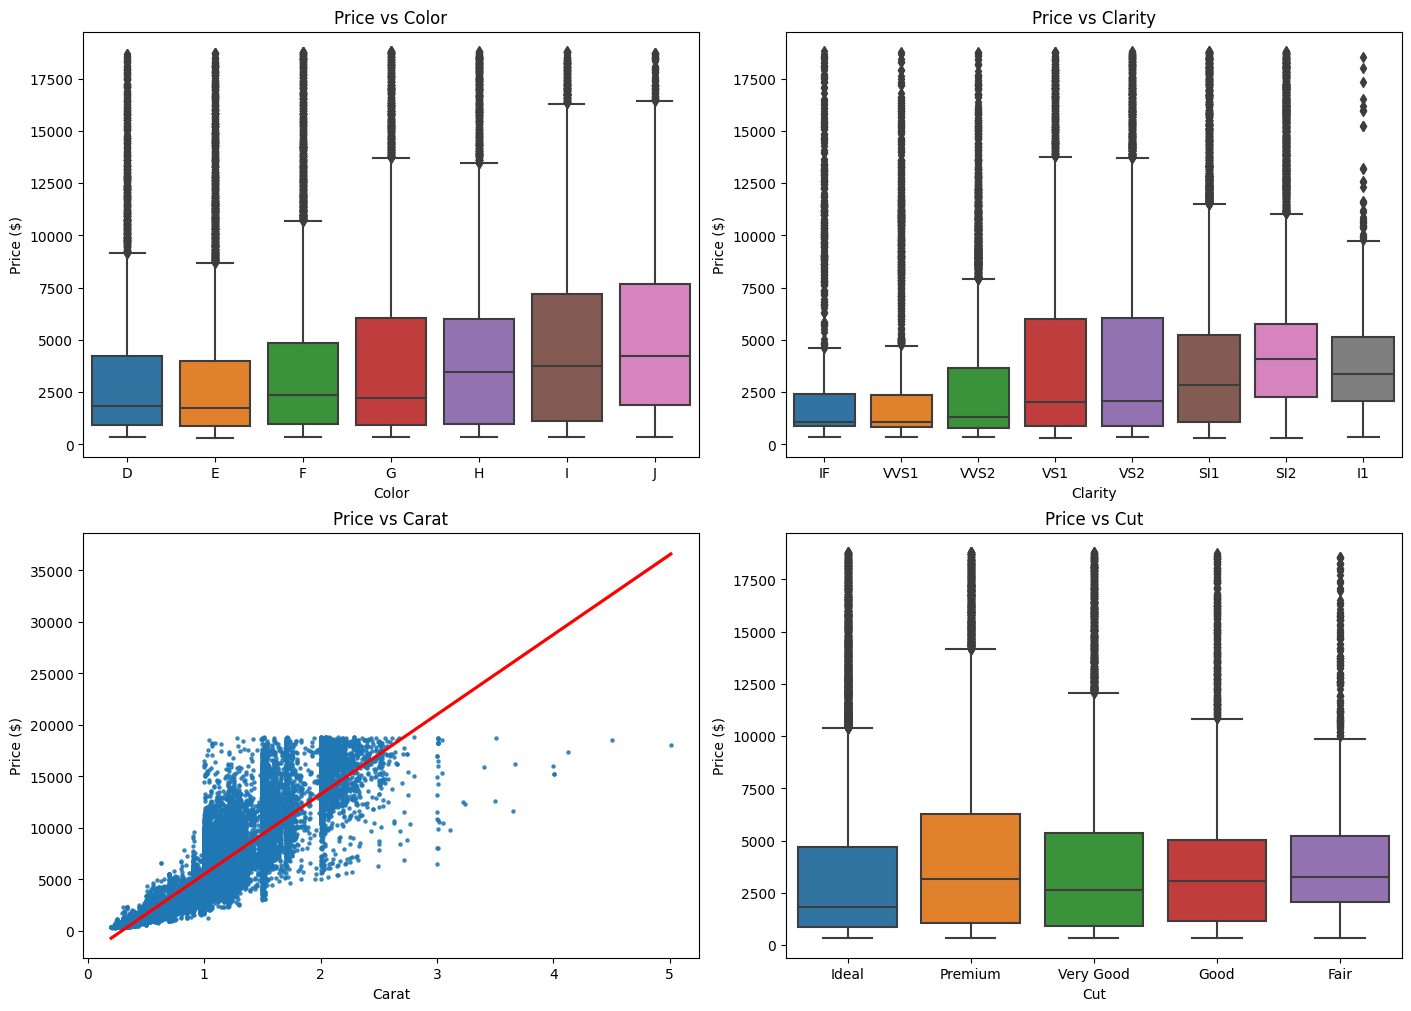

In [11]:
# Set up a 2x2 grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), constrained_layout=True)

# Boxplot for price vs color
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
sns.boxplot(ax=axs[0, 0], data=data, x='color', y='price', order=color_order)
axs[0, 0].set_title('Price vs Color')
axs[0, 0].set_xlabel('Color')
axs[0, 0].set_ylabel('Price ($)')

# Boxplot for price vs clarity
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.boxplot(ax=axs[0, 1], data=data, x='clarity', y='price', order=clarity_order)
axs[0, 1].set_title('Price vs Clarity')
axs[0, 1].set_xlabel('Clarity')
axs[0, 1].set_ylabel('Price ($)')

# Scatter plot for price vs carat with regression line
sns.regplot(ax=axs[1, 0], data=data, x='carat', y='price', scatter_kws={'s': 5}, line_kws={'color': 'red'})
axs[1, 0].set_title('Price vs Carat')
axs[1, 0].set_xlabel('Carat')
axs[1, 0].set_ylabel('Price ($)')

# Boxplot for price vs cut
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
sns.boxplot(ax=axs[1, 1], data=data, x='cut', y='price', order=cut_order)
axs[1, 1].set_title('Price vs Cut')
axs[1, 1].set_xlabel('Cut')
axs[1, 1].set_ylabel('Price ($)')

# Show the plot
plt.show()

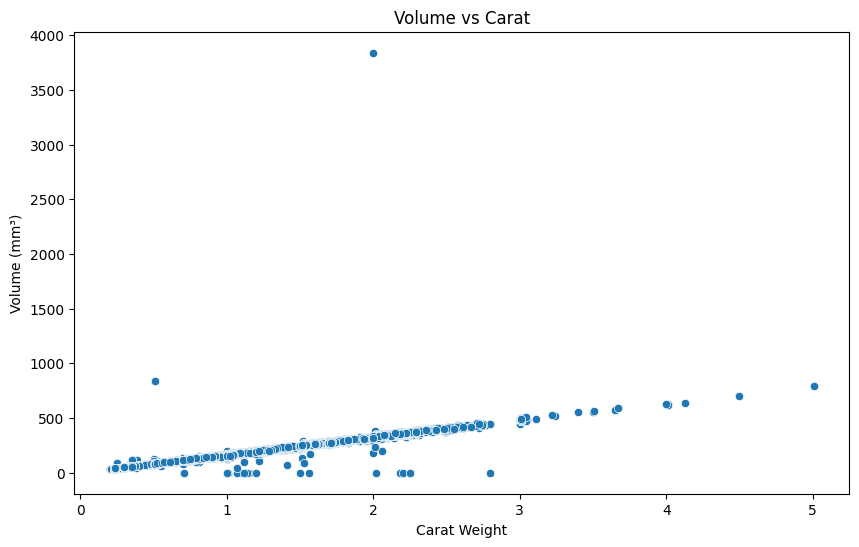

In [12]:
data['volume'] = data['x'] * data['y'] * data['z']
# Create the scatter plot for volume vs carat
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='volume', data=data)
plt.title('Volume vs Carat')
plt.xlabel('Carat Weight')
plt.ylabel('Volume (mm³)')
plt.show()

In [13]:
outliers = data[data['volume'] > 3500]
print(outliers)

       carat      cut color clarity  depth  table  price     x     y     z  \
24067    2.0  Premium     H     SI2   58.9   57.0  12210  8.09  58.9  8.06   

           volume  
24067  3840.59806  


##Find Missing Values

In [14]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
volume     0
dtype: int64

#Task 5: Perform Data Cleaning

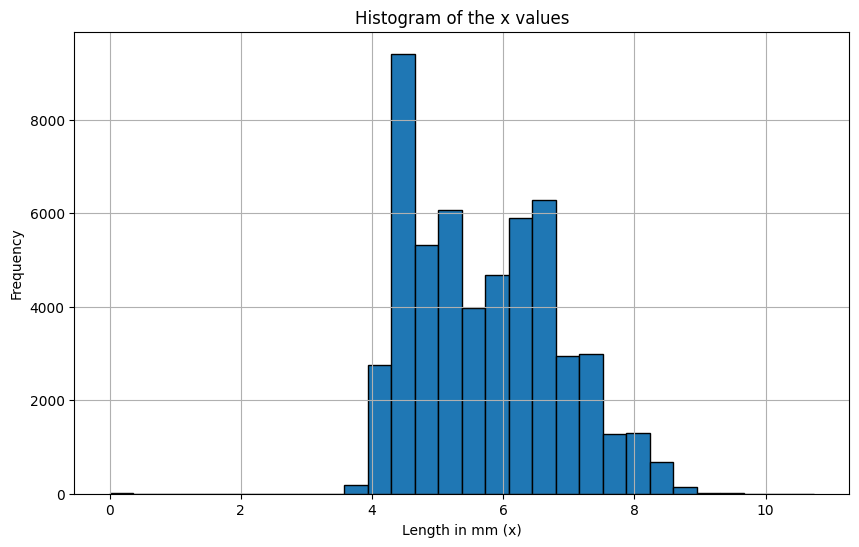

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64


In [15]:
x_descriptive_stats = data['x'].describe()
plt.figure(figsize=(10, 6))
plt.hist(data['x'], bins=30, edgecolor='black')
plt.title('Histogram of the x values')
plt.xlabel('Length in mm (x)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print(x_descriptive_stats)

In [16]:
zero_x_entries = data[data['x'] == 0]
print(zero_x_entries)

       carat        cut color clarity  depth  table  price    x     y    z  \
11182   1.07      Ideal     F     SI2   61.6   56.0   4954  0.0  6.62  0.0   
11963   1.00  Very Good     H     VS2   63.3   53.0   5139  0.0  0.00  0.0   
15951   1.14       Fair     G     VS1   57.5   67.0   6381  0.0  0.00  0.0   
24520   1.56      Ideal     G     VS2   62.2   54.0  12800  0.0  0.00  0.0   
26243   1.20    Premium     D    VVS1   62.1   59.0  15686  0.0  0.00  0.0   
27429   2.25    Premium     H     SI2   62.8   59.0  18034  0.0  0.00  0.0   
49556   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0   
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.0  0.00  0.0   

       volume  
11182     0.0  
11963     0.0  
15951     0.0  
24520     0.0  
26243     0.0  
27429     0.0  
49556     0.0  
49557     0.0  


In [17]:
data = data[data['x'] != 0]

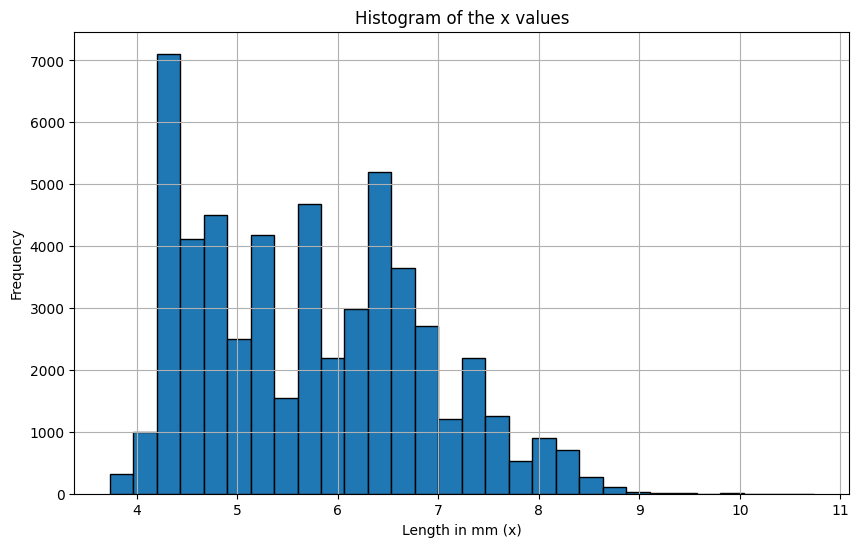

count    53932.000000
mean         5.732007
std          1.119670
min          3.730000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64


In [18]:
x_descriptive_stats = data['x'].describe()
plt.figure(figsize=(10, 6))
plt.hist(data['x'], bins=30, edgecolor='black')
plt.title('Histogram of the x values')
plt.xlabel('Length in mm (x)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print(x_descriptive_stats)

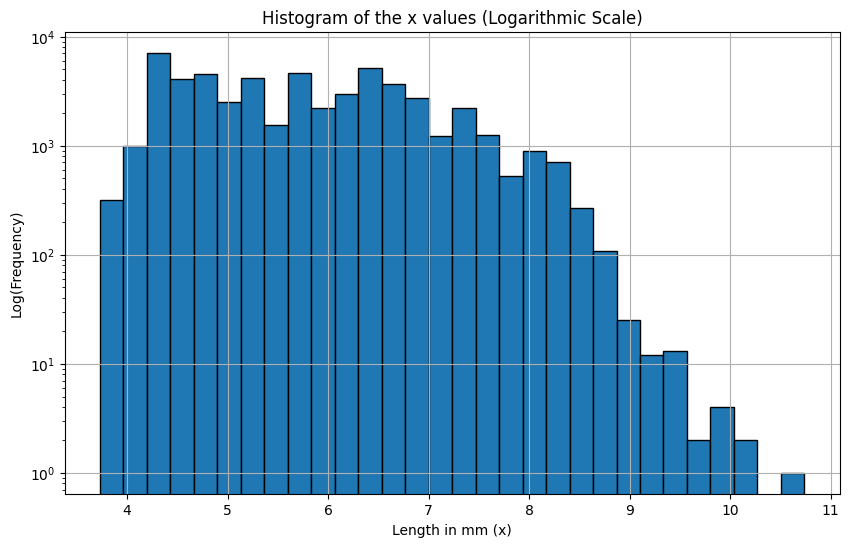

count    53932.000000
mean         5.732007
std          1.119670
min          3.730000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64


In [19]:
x_descriptive_stats = data['x'].describe()
plt.figure(figsize=(10, 6))
plt.hist(data['x'], bins=30, edgecolor='black', log=True)
plt.title('Histogram of the x values (Logarithmic Scale)')
plt.xlabel('Length in mm (x)')
plt.ylabel('Log(Frequency)')
plt.grid(True)
plt.show()
print(x_descriptive_stats)

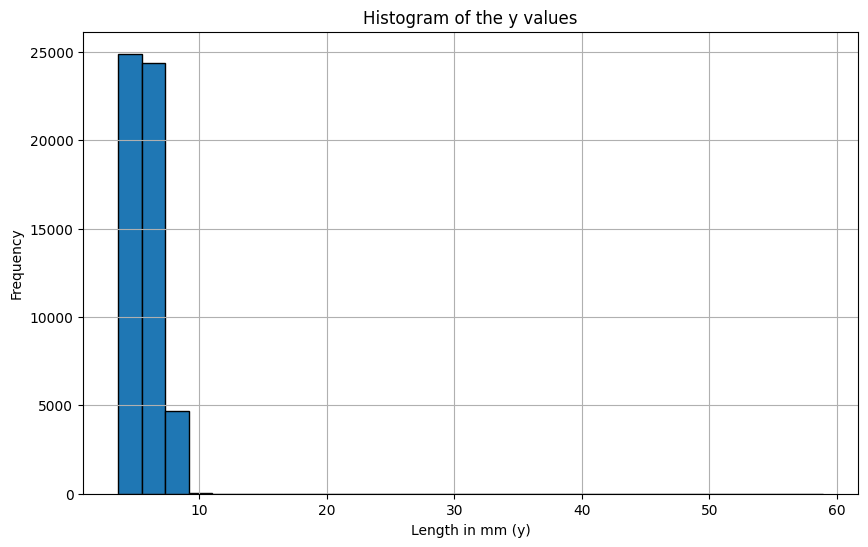

count    53932.000000
mean         5.735254
std          1.140343
min          3.680000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64


In [20]:
y_descriptive_stats = data['y'].describe()
plt.figure(figsize=(10, 6))
plt.hist(data['y'], bins=30, edgecolor='black')
plt.title('Histogram of the y values')
plt.xlabel('Length in mm (y)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print(y_descriptive_stats)

In [21]:
outlier_y_entries = data[data['y'] > 11]
print(outlier_y_entries)

       carat      cut color clarity  depth  table  price     x     y     z  \
24067   2.00  Premium     H     SI2   58.9   57.0  12210  8.09  58.9  8.06   
49189   0.51    Ideal     E     VS1   61.8   55.0   2075  5.15  31.8  5.12   

           volume  
24067  3840.59806  
49189   838.50240  


In [22]:
data = data[data['y'] < 11]

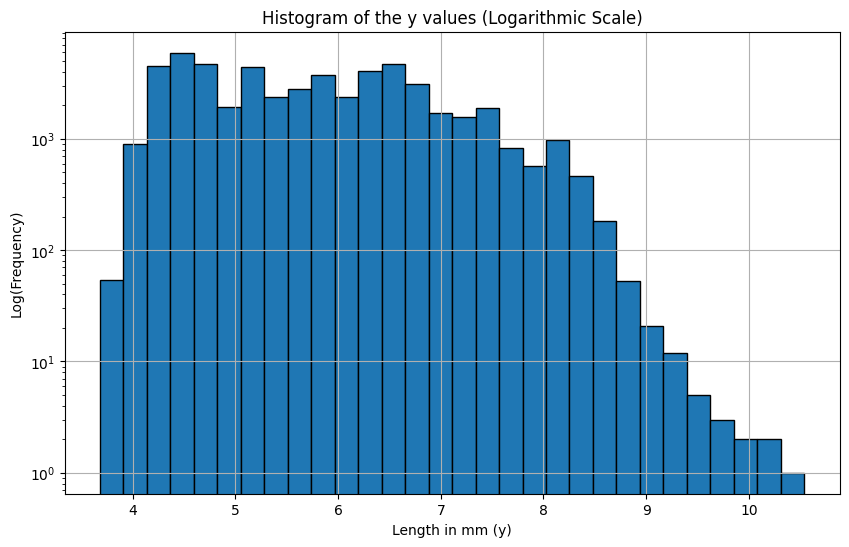

count    53930.000000
mean         5.733785
std          1.111494
min          3.680000
25%          4.720000
50%          5.710000
75%          6.540000
max         10.540000
Name: y, dtype: float64


In [23]:
y_descriptive_stats = data['y'].describe()
plt.figure(figsize=(10, 6))
plt.hist(data['y'], bins=30, edgecolor='black', log=True)
plt.title('Histogram of the y values (Logarithmic Scale)')
plt.xlabel('Length in mm (y)')
plt.ylabel('Log(Frequency)')
plt.grid(True)
plt.show()
print(y_descriptive_stats)

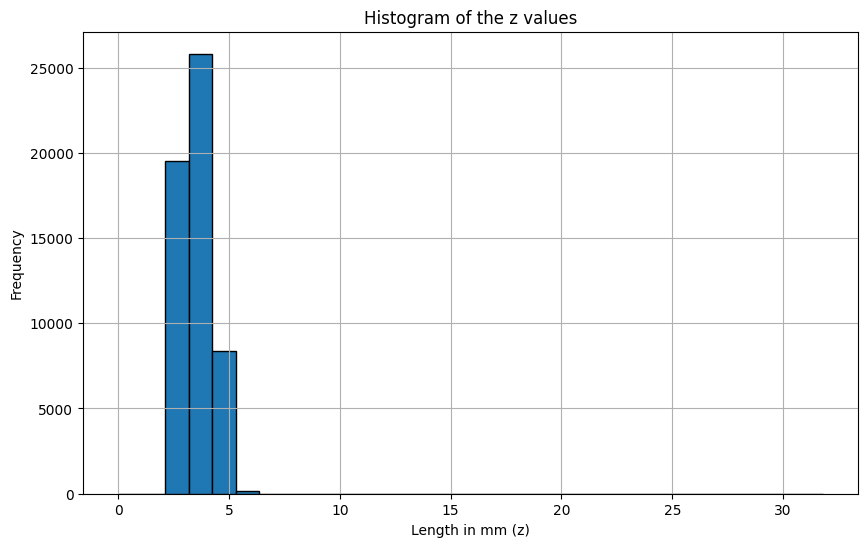

count    53930.000000
mean         3.539146
std          0.704145
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64


In [24]:
z_descriptive_stats = data['z'].describe()
plt.figure(figsize=(10, 6))
plt.hist(data['z'], bins=30, edgecolor='black')
plt.title('Histogram of the z values')
plt.xlabel('Length in mm (z)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
print(z_descriptive_stats)

In [25]:
outlier_z_entries = data[data['z'] > 7]
print(outlier_z_entries)

       carat        cut color clarity  depth  table  price     x     y     z  \
48410   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12  5.15  31.8   

         volume  
48410  838.5024  


In [26]:
data = data[data['z'] < 7]

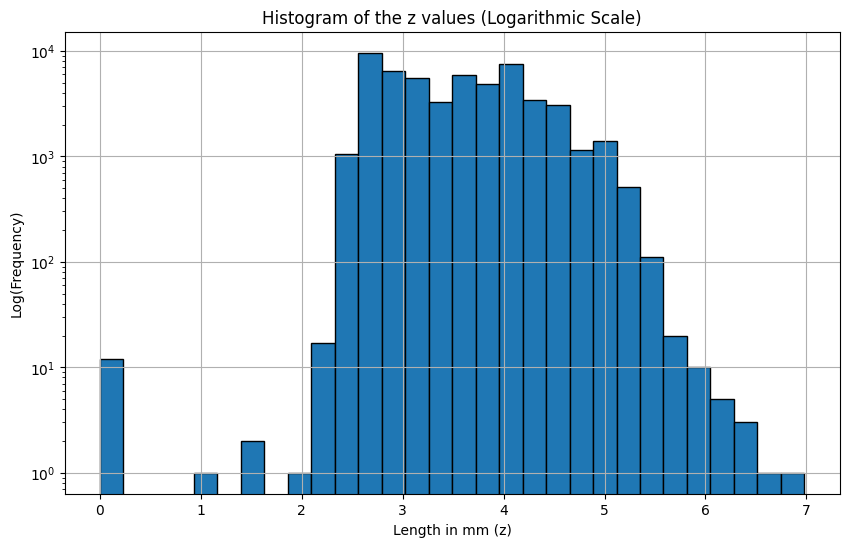

count    53929.000000
mean         3.538622
std          0.693555
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max          6.980000
Name: z, dtype: float64


In [27]:
z_descriptive_stats = data['z'].describe()
plt.figure(figsize=(10, 6))
plt.hist(data['z'], bins=30, edgecolor='black', log=True)
plt.title('Histogram of the z values (Logarithmic Scale)')
plt.xlabel('Length in mm (z)')
plt.ylabel('Log(Frequency)')
plt.grid(True)
plt.show()
print(z_descriptive_stats)

In [28]:
data = data[data['z'] != 0]

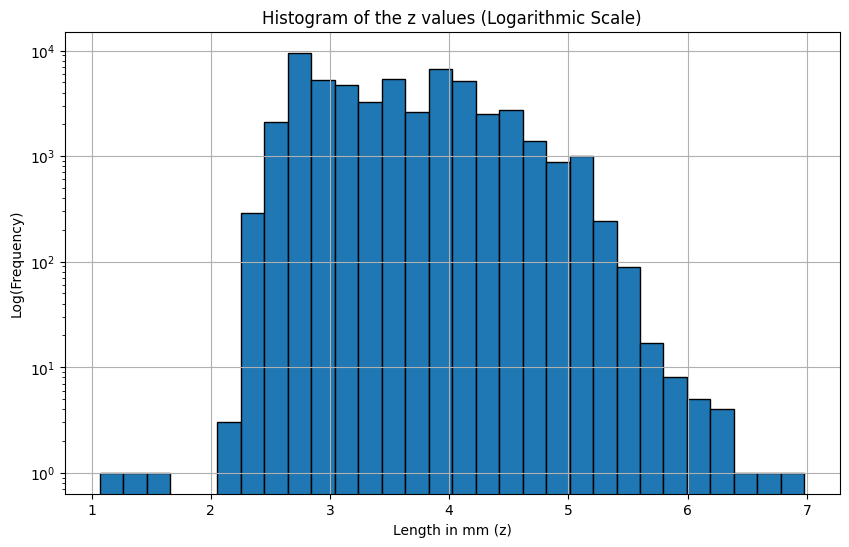

count    53917.000000
mean         3.539409
std          0.691620
min          1.070000
25%          2.910000
50%          3.530000
75%          4.040000
max          6.980000
Name: z, dtype: float64


In [29]:
z_descriptive_stats = data['z'].describe()
plt.figure(figsize=(10, 6))
plt.hist(data['z'], bins=30, edgecolor='black', log=True)
plt.title('Histogram of the z values (Logarithmic Scale)')
plt.xlabel('Length in mm (z)')
plt.ylabel('Log(Frequency)')
plt.grid(True)
plt.show()
print(z_descriptive_stats)

In [30]:
outlier_z_entries = data[data['z'] < 2]
print(outlier_z_entries)

       carat    cut color clarity  depth  table  price     x     y     z  \
14635   1.07  Ideal     F     SI1   60.6   57.0   5909  6.62  6.67  1.07   
20694   1.53  Ideal     I     SI1   61.9   54.0   8971  7.43  7.50  1.53   
21654   1.41  Ideal     H     VS1   60.7   56.0   9752  7.31  7.22  1.41   

          volume  
14635  47.246278  
20694  85.259250  
21654  74.417262  


In [31]:
data = data[data['z'] > 2]

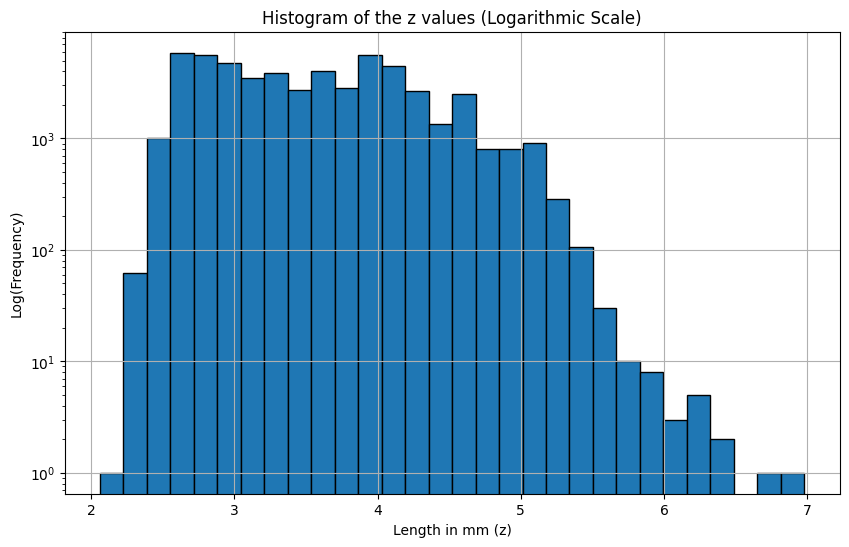

count    53914.000000
mean         3.539532
std          0.691443
min          2.060000
25%          2.910000
50%          3.530000
75%          4.040000
max          6.980000
Name: z, dtype: float64


In [32]:
z_descriptive_stats = data['z'].describe()
plt.figure(figsize=(10, 6))
plt.hist(data['z'], bins=30, edgecolor='black', log=True)
plt.title('Histogram of the z values (Logarithmic Scale)')
plt.xlabel('Length in mm (z)')
plt.ylabel('Log(Frequency)')
plt.grid(True)
plt.show()
print(z_descriptive_stats)

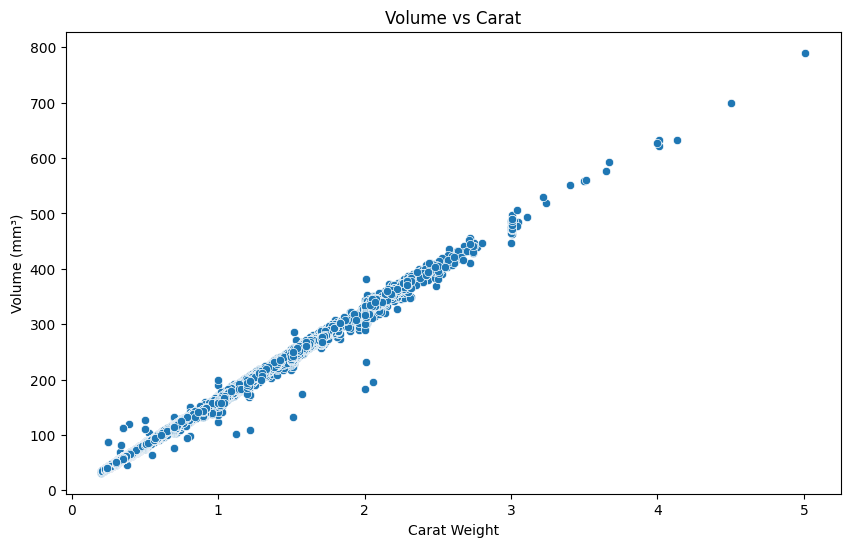

In [33]:
# Create the scatter plot for volume vs carat
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='volume', data=data)
plt.title('Volume vs Carat')
plt.xlabel('Carat Weight')
plt.ylabel('Volume (mm³)')
plt.show()

In [34]:
data = data.drop('volume', axis=1)

In [35]:
clarity_mapping = {clarity: rank for rank, clarity in enumerate(clarity_order, start=1)}
print(clarity_mapping)

{'IF': 1, 'VVS1': 2, 'VVS2': 3, 'VS1': 4, 'VS2': 5, 'SI1': 6, 'SI2': 7, 'I1': 8}


In [36]:
data['clarity'] = data['clarity'].map(clarity_mapping)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,7,63.3,58.0,335,4.34,4.35,2.75


In [37]:
cut_mapping = {cut: rank for rank, cut in enumerate(cut_order, start=1)}
print(cut_mapping)

{'Ideal': 1, 'Premium': 2, 'Very Good': 3, 'Good': 4, 'Fair': 5}


In [38]:
data['cut'] = data['cut'].map(cut_mapping)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,E,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,E,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,J,7,63.3,58.0,335,4.34,4.35,2.75


In [39]:
color_mapping = {color: rank for rank, color in enumerate(color_order, start=1)}
print(color_mapping)

{'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}


In [40]:
data['color'] = data['color'].map(color_mapping)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1,2,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,2,2,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,2,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,7,7,63.3,58.0,335,4.34,4.35,2.75


I'm dropping x, y, z, depth, and table as they don't significantly contribute to the accuracy, per earlier testing

In [41]:
data = data.drop(['x', 'y', 'z', 'depth', 'table'], axis=1)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53914 entries, 0 to 53939
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53914 non-null  float64
 1   cut      53914 non-null  int64  
 2   color    53914 non-null  int64  
 3   clarity  53914 non-null  int64  
 4   price    53914 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 2.5 MB


In [43]:
#scaler = MinMaxScaler()
#data[['carat', 'depth', 'table', 'x', 'y', 'z']] = scaler.fit_transform(data[['carat', 'depth', 'table', 'x', 'y', 'z']])

#Task 6: Visualize Cleaned up Dataset

#Task 7: Conceptualize the problem

In [44]:
# estimate price based on carat, depth, table, dimensions, clarity, color, and cut

#Task 8: Perform Data-Split

In [45]:
print(data.columns)

Index(['carat', 'cut', 'color', 'clarity', 'price'], dtype='object')


In [46]:
x = data[['carat', 'cut', 'color', 'clarity']].values
y = data['price'].values

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 101)

In [48]:
print(f'The shape of the data is: \nx_train: \t{x_train.shape} \nx_test: \t{x_test.shape} \ny_train: \t{y_train.shape} \ny_test: \t{y_test.shape}')

The shape of the data is: 
x_train: 	(43131, 4) 
x_test: 	(10783, 4) 
y_train: 	(43131,) 
y_test: 	(10783,)


#Task 9: Choose the ML Method to follow

In [49]:
LinearRegression_model = LinearRegression()
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
XGBRegressor_model = XGBRegressor()

#Task 10: Train the ML Model

In [50]:
models = [LinearRegression_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]
for model in models:
    model.fit(x_train, y_train)
    print(f'{model} is trained!')

LinearRegression() is trained!
DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) is trained!


In [51]:
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_XGBoost = XGBRegressor_model.score(x_test, y_test)

In [52]:
models = {'LinearRegression_model': accuracy_LinearRegression, 'DecisionTree_model': accuracy_DecisionTree, 'RandomForest_model': accuracy_RandomForest,
          'XGBRegressor_model': accuracy_XGBoost}
for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score*100, 2)}%')

The accuracy score for the LinearRegression_model is 90.36%
The accuracy score for the DecisionTree_model is 97.3%
The accuracy score for the RandomForest_model is 97.88%
The accuracy score for the XGBRegressor_model is 97.99%


In [53]:
# Number of folds
k = 10

# Setting up the K-Fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and compute the mean accuracy for each model
linear_reg_score = cross_val_score(LinearRegression_model, x, y, cv=kf).mean()
decision_tree_score = cross_val_score(DecisionTree_model, x, y, cv=kf).mean()
random_forest_score = cross_val_score(RandomForest_model, x, y, cv=kf).mean()
xgb_score = cross_val_score(XGBRegressor_model, x, y, cv=kf).mean()

# Print the scores
print(f"Linear Regression CV Score: {round(linear_reg_score*100, 2)}")
print(f"Decision Tree CV Score: {round(decision_tree_score*100, 2)}")
print(f"Random Forest CV Score: {round(random_forest_score*100, 2)}")
print(f"XGBRegressor CV Score: {round(xgb_score*100, 2)}")

Linear Regression CV Score: 90.41
Decision Tree CV Score: 97.35
Random Forest CV Score: 97.87
XGBRegressor CV Score: 98.05


In [54]:
models = [LinearRegression_model, DecisionTree_model, RandomForest_model, XGBRegressor_model]
for model in models:
    y_pred = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{model.__class__.__name__} RMSE: {round(rmse*100, 2)}")

LinearRegression RMSE: 123548.28
DecisionTreeRegressor RMSE: 65438.8
RandomForestRegressor RMSE: 57962.69
XGBRegressor RMSE: 56358.06


I'm choosing the XGBRegressor model for its high accuracy, robustness as confirmed by K-fold cross-validation, and the lowest Root Mean Squared Error (RMSE).

In [55]:
print(data.columns)

Index(['carat', 'cut', 'color', 'clarity', 'price'], dtype='object')


In [56]:
feature_data = data.drop('price', axis=1)
print(feature_data.columns)

Index(['carat', 'cut', 'color', 'clarity'], dtype='object')


In [57]:
# Retrieve feature importances
importances = XGBRegressor_model.feature_importances_

# Convert the importances into a more readable format and sort them
feature_importances = pd.Series(importances, index=feature_data.columns).sort_values(ascending=False)

print(feature_importances)

carat      0.841338
clarity    0.104456
color      0.047974
cut        0.006232
dtype: float32


In [58]:
predictions = XGBRegressor_model.predict(x)


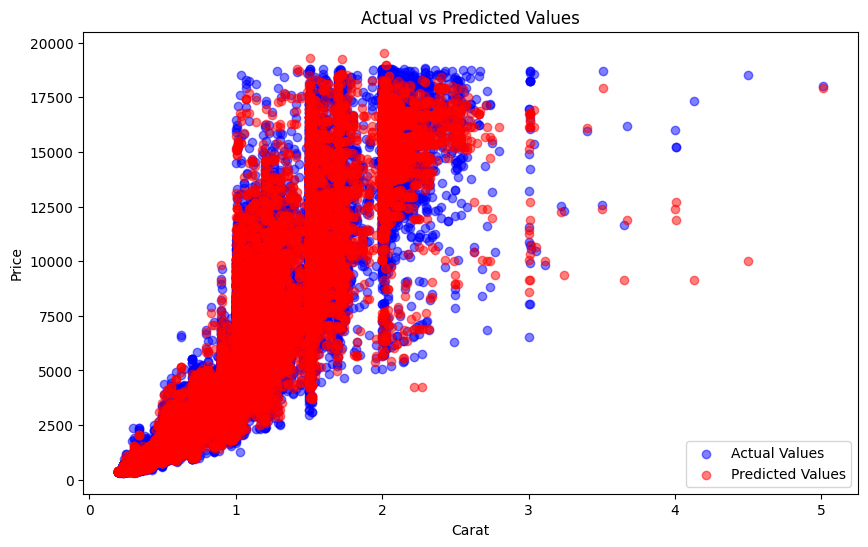

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], y, color='blue', alpha=0.5, label='Actual Values')

# Plotting the predicted values
plt.scatter(x[:, 0], predictions, color='red', alpha=0.5, label='Predicted Values')

# Adding titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

#Task 11: Test the Model

In [60]:
choice = 10000
row_to_predict = data.iloc[choice]
actual_value = row_to_predict['price']
row_to_predict = row_to_predict.drop('price')
row_to_predict = row_to_predict.values.reshape(1, -1)
prediction = XGBRegressor_model.predict(row_to_predict)
print(row_to_predict)
print(f"The predicted value is: {prediction[0]:.2f}")
print(f"The actual value is: {actual_value:.2f}")

[[0.91 1.   2.   6.  ]]
The predicted value is: 4599.57
The actual value is: 4706.00


In [61]:
joblib.dump(XGBRegressor_model, '/content/drive/MyDrive/diamond_price.joblib')

['/content/drive/MyDrive/diamond_price.joblib']